# Machine learning

## Recognizing letters and numbers from handwriting

Importing the necessary libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import cluster
from PIL import Image

Loading and testing an image via Pillow Library

In [2]:
#A variable is assigned to open and hold the test image
imageTest = Image.open("imageTest.jpg");

#some details checking about the image
print(imageTest.format);
print(imageTest.size);
print(imageTest.mode);

JPEG
(1360, 768)
RGB


Converting the image loaded into an Array from NumPy library

In [3]:
#using np.array() to convert an image in numpy array
imageArray = np.array(imageTest);

#printing the type of it
print(type(imageArray));

#printing the shape of the image
print(imageArray.shape);

#priting the data of the imageArray representing each pixel of it
print(imageArray);

#Creating an image from the imageArray
imageCreated = Image.fromarray(imageArray);
print(type(imageCreated));

#Check the image details
print(imageCreated.mode);
print(imageCreated.size);

#converting the image to greyscale
imageGreyscale = imageTest.convert("L");

#saving the image
imageGreyscale.save("greyscale.jpeg");

#Priting the data of the imageGreyscale
print(np.array(imageGreyscale));

<class 'numpy.ndarray'>
(768, 1360, 3)
[[[ 75   2  73]
  [ 75   2  73]
  [ 75   2  73]
  ...
  [ 76   3  72]
  [ 75   2  71]
  [ 75   2  71]]

 [[ 75   2  73]
  [ 75   2  73]
  [ 75   2  73]
  ...
  [ 74   1  70]
  [ 74   1  70]
  [ 73   0  69]]

 [[ 75   2  73]
  [ 75   2  73]
  [ 75   2  73]
  ...
  [ 75   2  71]
  [ 75   2  71]
  [ 75   2  71]]

 ...

 [[  1  75 234]
  [  1  75 234]
  [  0  75 229]
  ...
  [ 62  48 145]
  [ 62  48 143]
  [ 61  47 144]]

 [[ 36  49 179]
  [ 36  49 177]
  [ 36  50 173]
  ...
  [ 68  62 152]
  [ 68  61 154]
  [ 67  61 151]]

 [[ 55  65 215]
  [ 54  66 214]
  [ 54  66 214]
  ...
  [ 30 140 255]
  [ 30 142 254]
  [ 29 139 252]]]
<class 'PIL.Image.Image'>
RGB
(1360, 768)
[[ 32  32  32 ...  33  32  32]
 [ 32  32  32 ...  31  31  30]
 [ 32  32  32 ...  32  32  32]
 ...
 [ 71  71  70 ...  63  63  62]
 [ 60  60  60 ...  74  74  73]
 [ 79  79  79 ... 120 121 119]]


Creating a function to load image and convert to greyscale

In [4]:
def imageLoadGrey(image):
    "Converts an image to greyscale and return an array about it"
    return np.array(image.convert("L"));

#testing the function
print(imageLoadGrey(imageTest));

[[ 32  32  32 ...  33  32  32]
 [ 32  32  32 ...  31  31  30]
 [ 32  32  32 ...  32  32  32]
 ...
 [ 71  71  70 ...  63  63  62]
 [ 60  60  60 ...  74  74  73]
 [ 79  79  79 ... 120 121 119]]


### 1 - Collecting the data

The Dataset utilized is Balanced dataset within the Extended MNIST

1. The EMNIST Balanced dataset is meant to address the balance issues in the ByClass and ByMerge datasets. It is derived from the ByMerge dataset to reduce     mis-classification errors due to capital and lower case letters and also has an equal number of samples per class. This dataset is meant to be the most applicable.
    train: 112,800
    test: 18,800
    total: 131,600
    classes: 47 (balanced)

2. CSV  (combined labels and images)
    The datasets are called "emnist-balanced-test" and "emnist-balanced-train" every element is separated by comma and there are no empty elements
    Each row is a separate image.
    The dataset has 785 colums and the First column is the class label (see mappings.txt for class label definitions).
    Each column after the class label, represents one pixel value (784 total for a 28 x 28 image).
    Each pixes has and associated value raging from 0 to 255(inclusive), indicating its greyscale.

In [5]:
#reading the dataset train and showing it's head
dataSetTrain = pd.read_csv("archive\emnist-balanced-train.csv", header=None);

dataSetTrain

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112795,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112798,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#reading the dataset test and whoing it's head
dataSetTest = pd.read_csv("archive\emnist-balanced-test.csv", header=None);

dataSetTest

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18796,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18797,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18798,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Implementing map for the labels 
labelMap = pd.read_csv("archive\emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None).squeeze(True);

labelMap

0
0      48
1      49
2      50
3      51
4      52
5      53
6      54
7      55
8      56
9      57
10     65
11     66
12     67
13     68
14     69
15     70
16     71
17     72
18     73
19     74
20     75
21     76
22     77
23     78
24     79
25     80
26     81
27     82
28     83
29     84
30     85
31     86
32     87
33     88
34     89
35     90
36     97
37     98
38    100
39    101
40    102
41    103
42    104
43    110
44    113
45    114
46    116
Name: 1, dtype: int64

In [9]:
#Implementing a hashmap with the labelMap character ascii value as keys (C++ users) 
labelHashMap = {}
for index, label in enumerate(labelMap):
    labelHashMap[index] = chr(label)

labelHashMap

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [11]:
#uncommnet this part for drive mounting
#from google.colab import drive
#drive.mount("/content/drive");

### 2 - Explore the data

Now it's time to explore the dataset:
    1. How many examples there are in the datasets?
    2. How many examples which class has?
    3. How are the letters we are trying to recognize?

In [12]:
#1.a Showing all examples for the train dataset
dataSetTrain[0].count()

112800

In [14]:
#2.b Showing all examples for the test dataset
dataSetTest[0].count()

18800

In [13]:
#2.a Showing which class example
dataSetTrain.groupby(0).count()[1]

0
0     2400
1     2400
2     2400
3     2400
4     2400
5     2400
6     2400
7     2400
8     2400
9     2400
10    2400
11    2400
12    2400
13    2400
14    2400
15    2400
16    2400
17    2400
18    2400
19    2400
20    2400
21    2400
22    2400
23    2400
24    2400
25    2400
26    2400
27    2400
28    2400
29    2400
30    2400
31    2400
32    2400
33    2400
34    2400
35    2400
36    2400
37    2400
38    2400
39    2400
40    2400
41    2400
42    2400
43    2400
44    2400
45    2400
46    2400
Name: 1, dtype: int64

In [15]:
#2.a Showing which class example
dataSetTest.groupby(0).count()[1]

0
0     400
1     400
2     400
3     400
4     400
5     400
6     400
7     400
8     400
9     400
10    400
11    400
12    400
13    400
14    400
15    400
16    400
17    400
18    400
19    400
20    400
21    400
22    400
23    400
24    400
25    400
26    400
27    400
28    400
29    400
30    400
31    400
32    400
33    400
34    400
35    400
36    400
37    400
38    400
39    400
40    400
41    400
42    400
43    400
44    400
45    400
46    400
Name: 1, dtype: int64

In [16]:
pd.isnull(dataSetTrain).count(True)

0         785
1         785
2         785
3         785
4         785
         ... 
112795    785
112796    785
112797    785
112798    785
112799    785
Length: 112800, dtype: int64

In [17]:
pd.isnull(dataSetTest).count(True)

0        785
1        785
2        785
3        785
4        785
        ... 
18795    785
18796    785
18797    785
18798    785
18799    785
Length: 18800, dtype: int64

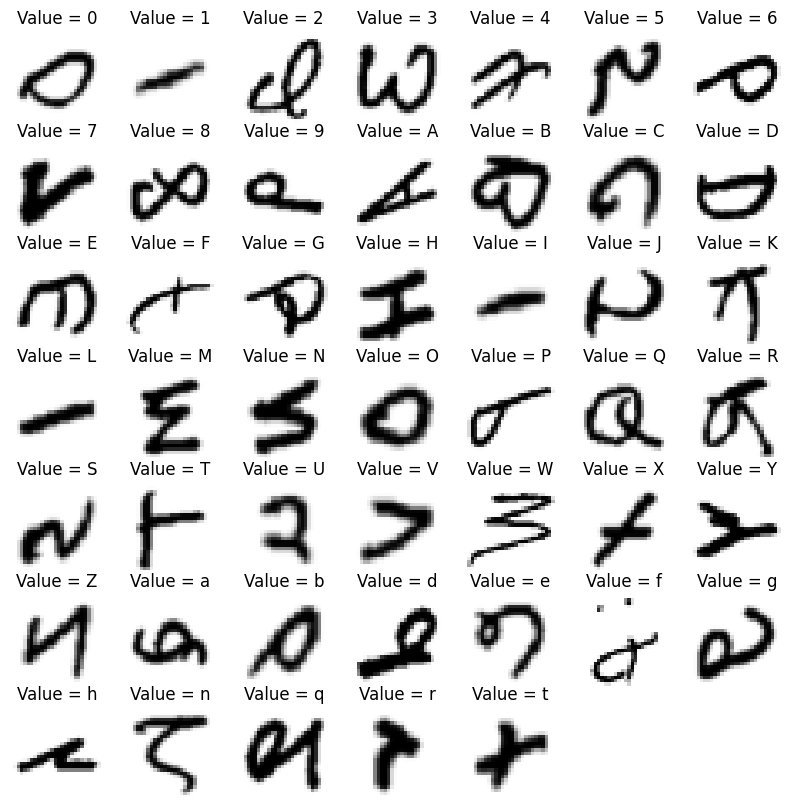

In [18]:
#3. Visualizing the letters and numbers

#picking an example from each class
examples = {};

for letters in range(47):
    for index,row in dataSetTrain.iterrows():
        if letters == row[0]:
            vetorImg = np.zeros((1,784));
            j = 0;
            for pixel in row.keys()[1:]:
                vetorImg[0,j] = row[pixel];
                j+=1;
            matrizImg = vetorImg.reshape((28,28));
            break;
    examples[letters] = matrizImg;

#generating an image from each example
plt.figure(figsize=[10,10]);
for letter in range(47):
    plt.subplot(7,7, letter+1);
    plt.axis('off');
    plt.imshow(examples[letter], cmap=plt.cm.gray_r, interpolation='nearest');
    plt.title('Value = %s'%labelHashMap[letter]);
plt.show();

Rotating the letters and numbers

Label:  9


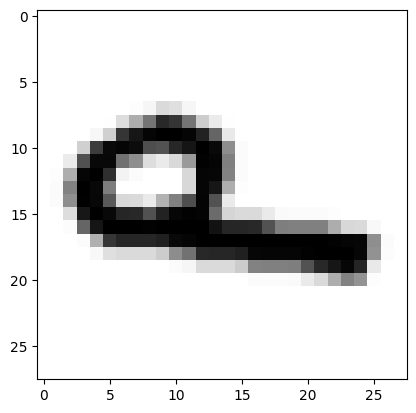

In [19]:
#Getting an image from the dataSet with its label
sampleImageLabeled = dataSetTrain.iloc[45]

#Removing its first columns which its labeled
sampleImage = sampleImageLabeled.iloc[1:]

#Priting its label which is stored in the hashmap
print("Label: ", labelHashMap[sampleImageLabeled[0]])

#Ploting the image 
plt.imshow(sampleImage.values.reshape(28, 28), cmap=plt.cm.gray_r)

Label:  9


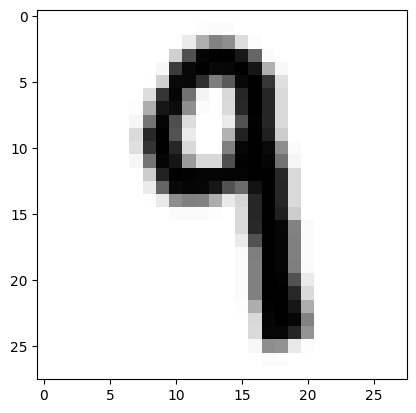

In [20]:
def rotateAndReshape(image):
    "A function that rotates and reshape an image. "
    width = 28 
    height = 28
    image = image.reshape(width, height)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

#Priting its label which is stored in the hashmap
print("Label: ", labelHashMap[sampleImageLabeled[0]])

#rotating the image 
plt.imshow(rotateAndReshape(sampleImage.values), cmap=plt.cm.gray_r)

Now it's time to apply rotateAndReshape to all images in the dataSetTrain and dataSetTest

In [21]:
#rotate and shape 
rotatedTrain = np.apply_along_axis(rotateAndReshape, 1, dataSetTrain.loc[:, 1:].values)
rotatedTrain.shape

rotatedTrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 5, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [22]:
#rotate and shape 
rotatedTest = np.apply_along_axis(rotateAndReshape, 1, dataSetTest.loc[:, 1:].values)
rotatedTest.shape

rotatedTest

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

TypeError: cannot unpack non-iterable int object

### 3 - Build/Choose the model

We'll use the classifier Support Vector Classifier (SVC) do a linear separation

In [ ]:
classifier = svm.SVC(kernel="linear");

### 4 - Train the model

Training the classifier with train data

In [ ]:
#Look to all data
sizeTrain = rotatedTrain.shape;
sizeTest = rotatedTest.shape;
print("Size for Train", sizeTrain);
print("Size for Test", sizeTest);

#Spread all the data between features and classes
trainFeatures = dataSetTrain.loc[:, 0]
testFeatures = dataSetTest.loc[:, 0]

trainFeatures.shape

In [ ]:
#converting the Numpy Array to Pandas
index, width, height = rotatedTrain.shape
xTrain = rotatedTrain.reshape((index, width*height))

#converting the Numpy Array to Pandas
index, width, height = rotatedTest.shape
xTest = rotatedTest.reshape((index, width*height))

#getting the uniques labels expected 47
nyTrain = trainFeatures.nunique()
nyTest = testFeatures.nunique()

from keras.utils import np_utils

#getting and anmaking a 2d array with all examples and the number of labels 
yTrain = np_utils.to_categorical(trainFeatures, nyTrain)
yTest = np_utils.to_categorical(testFeatures, nyTest)

yTrain.shape


In [ ]:
#train the classifier with the train data 
classifier.fit(xTrain, trainFeatures);
testFeatures.head()


### 5 - Test and evaluate the results

In [ ]:
#Use the created model to predict the test examples classes  
testPrediction = classifier.predict(testFeatures);

In [ ]:
#Observe the generated result  by the classifier
confusionMatrix = metrics.confusion_matrix(xTest,testPrediction);
print(confusionMatrix);

In [ ]:
#Metrics report
metricsReport = metrics.classification_report(xTest,testPrediction);
print(metricsReport);